# GRIP - THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# PREDICTING WITH SUPERVISED ML - PYTHON SCIKIT LEARN

IMPORTING REQUIRED LIBRARIES

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score
import seaborn as sns
%matplotlib inline

COLLECTING DATA FROM DATASET

In [14]:
data = pd.read_csv('http://bit.ly/w-data')
print('Data Collected Successfully!')

Data Collected Successfully!


DATA EXPLORATION AND PREPROCESSING

In [15]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [16]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [18]:
data.isnull().values.any()

False

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


CHECKING CORRELATION BETWEEN HOURS AND SCORES

In [21]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows there is a significant correlation betwwen Hours and Scores

DATA VISUALIZATION

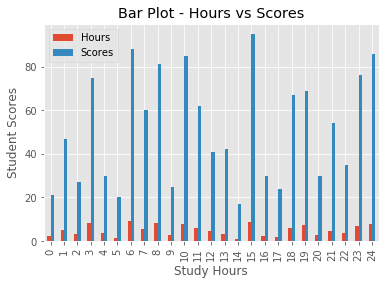

In [24]:
plt.style.use('ggplot')
data.plot(kind='bar')
plt.title('Bar Plot - Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.show()

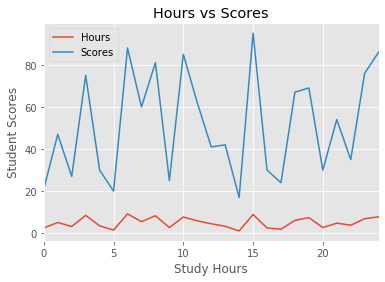

In [26]:
plt.style.use('ggplot')
data.plot(kind='line')
plt.title('Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.show()

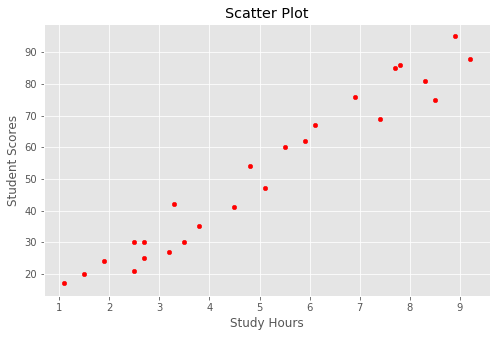

In [27]:
data.plot(kind='scatter', x='Hours', y='Scores', color='r', figsize=(8,5))
plt.title('Scatter Plot')
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.show()

After Data visualization it is clear that suitable Model for this problem is Linear Regression

BUILDING THE MODEL

In [39]:
X = data['Hours'].values.reshape(-1,1)
Y = data['Scores'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
regressor = LinearRegression()
print('Training Started\n')
regressor.fit(x_train, y_train)
print('Training Completed\n')
print('Coefficient : ', regressor.coef_)
print('Intercept : ', regressor.intercept_)

Training Started

Training Completed

Coefficient :  [9.94061514]
Intercept :  1.5079104828268726


PLOTTING MODEL

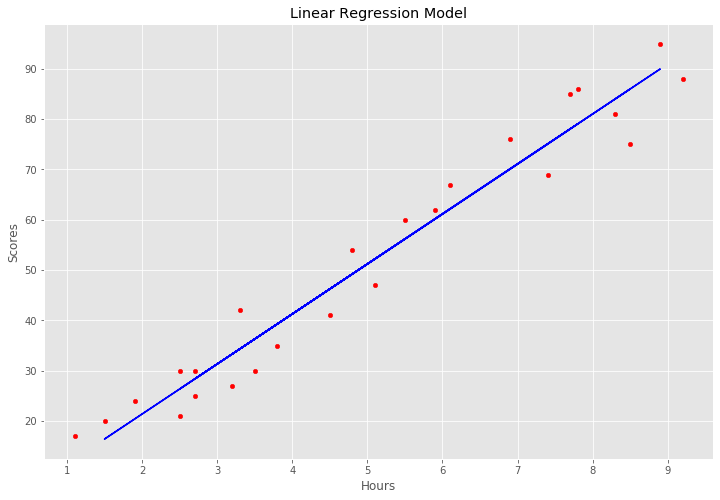

In [44]:
data.plot(kind='scatter', x='Hours', y='Scores', color='r', figsize=(12,8))
plt.plot(x_train,regressor.coef_[0]*x_train + regressor.intercept_,color='b')
plt.title('Linear Regression Model')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

The Blue line is the Model which fits perfectly for data.

PREDICTING USING THE MODEL

In [46]:
preds = regressor.predict(x_test)

MODEL EVALUATION

In [50]:
print('Mean absolute error : {}'.format(metrics.mean_absolute_error(y_test, preds)))
print('R2 Score : {}'.format(r2_score(y_test, preds)))

Mean absolute error : 4.877039354964484
R2 Score : 0.9735538080811826


In [51]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


PREDICTING SCORE FOR GIVEN SAMPLE VALUE

In [54]:
result = regressor.predict([[9.25]])
print('Given Study Hours : {}'.format(9.25))
print('Predicted Score : {}'.format(result[0]))

Given Study Hours : 9.25
Predicted Score : 93.45860055685799


CONCLUSION

By Collecting the required Data, Data preprocessing and visualization is done.
Linear Regression model is built and trained. 
Finally predicted for given input.